#### <a id='top'></a>

# Homework 4: Bayes' for Days
***

**Name**: Margaux McFarland

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 28**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

## (15 pts) Problem 1: Theory (Bayes)
***



To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *hypothesis* that has a 12% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *hypothesis* is true is 40%
    2) The probability that they incorrectly *find* an important result given that their *hypothesis* is false is 5%

If they *find* an important result they are published.  What is the probability that their *hypothesis* was true, given that they were published?

The probability that their hypothesis was true given they were published can be written as P(H|pub). Using Bayes Theorem, this can be written as $P(H|pub) = \frac{P(pub|H) * P(H)}{P(pub)} = \frac{P(pub|H) * P(H)}{(P(pub|H) * P(H)) + (P(pub|!H) * P(!H))}$. Given from the problem, we know P(H) = 0.12. Also if they find an important result, the result is published. It is also assumed that if the result is published, then they find someone important. Therefore property 1 can be written as P(pub|H) = 0.4 and P(pub|!H) = 0.05. We still need P(!H) which can be written as 1-P(H) because a hypothesis is either correct or incorrect, so P(!H) = 1-0.12 = 0.88. Plugging all these values in we get:

$P(H|pub) = \frac{0.4 * 0.12}{(0.4 * 0.12) + (0.05 * 0.88)} = 0.522$ 

Therefore, the probability that their hypothesis was true, given that they were published is 52.2%.

[Back to top](#top)
<a id='p2'></a>

## (40 pts) Problem 2: Computation (Iterative Bayes)
***

You have decided you want to play a game with your roommate. Since you're both in Introduction to Data Science, you have your big bag of mixed dice, and you know you can do something interesting with dice!

Unfortunately, you're trying to play while you bake (or maybe you've just come down with the chicken pox like Phoebe), so you're playing while wearing oven mitts that you simply cannot remove. Because of this fact, you can use your hands to pull dice from the bag, but cannot feel the dice.

<img style="width: 200px; padding: 3mm;" src="https://img.sharetv.com/shows/episodes/standard/204702.jpg" alt="Phoebe with chicken pox in oven mitts"/>

Double unfortunately, you've been trapped in these oven mitts while wearing your ultra comfortable Ostrich Pillow because you were napping! Because of this fact, you also cannot see the dice you pull from the bag.

<img style="width: 200px; padding: 3mm;" src="https://i.pinimg.com/originals/d7/a3/6a/d7a36ab2216276c17c1b8b575fccad54.jpg" alt="Phoebe with chicken pox in oven mitts"/>

Are you neither baking nor chicken poxed, and your roommate perhaps orchestrated this scenario to make this absurd situation arise? Who can say!

In your collection, you own:
* 20 fair six-sided dice (**S**), with faces `{1,2,3,4,5,6}`.
* 15 fair eight-sided dice (**E**), with faces `{1,2,3,4,5,6,7,8}`.
* 3 fair twenty-sided dice(**T**) (faces `{1,2,3,4,...,19,20}`).
* 2 fair one-hundred-sided dice (**H**) (faces `{1,2,3,4,...,99,100}`).

You and your roommate start to invent a game: you will blindly pull a die from the bag, roll the die, and your roommate will tell you what the result is. You will then guess how many sides - six, eight, twenty, or one hundred - the die you pulled has, and allocate points accordingly.

But how many points are appropriate? _You'll need to figure out some probabilities here to determine what's fair!_

Work the following problems by hand (or glove) for **Parts A through D and Part G** (but don't be afraid to simulate to check your result!). In **Parts E and F**, follow the instructions as written.

***
**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

There are 20 + 15 + 3 + 2 = 40 total dice to chose from in the bag. 20 of the dice only go up to 6, so there is a 0% chance you roll a seven if you pick those dice. Of the 20 other dice that can be 7s, 15 have a 1/8 chance of being a 7, 3 have a 1/20 chance, and 2 have a 1/100 chance. The probability of rolling a 7 or $P(R_7) = (\frac{20}{40}*0) + (\frac{15}{40}*\frac{1}{8}) + (\frac{3}{40}*\frac{1}{20}) + (\frac{2}{10}*\frac{1}{100}) = 0.0526$

***
**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die (**E**)? 

The probability that I chose an eight-sided die (E) given I rolled a seven can be written as P(E|7). Using Bayes Theorem, this expression can be further simplified to $P(E|7) = \frac{P(7|E) * P(E)}{P(7)} = \frac{P(7|E) * P(E)}{(P(7|E) * P(E)) + (P(7|!E) * P(!E))}$

We know P(7) = 0.0526 from part A. P(E) or the probability of picking an eight-sided die, is 15/40 = 0.375 because there are 15 out of 40 total dice. P(!E) = 1-P(E) = 0.625. The probability that a seven is rolled given its in eight-sided dice is 1/8 = 0.125 because it is a fair die with 8 sides. Likewise, the probability that a seven is rolled given its not an eight-sided die is $(\frac{20}{40}*0) + (\frac{3}{40}*\frac{1}{20}) + (\frac{2}{10}*\frac{1}{100}) = 0.00575$.

Plugging all these values into Bayes Theorem we get:

$P(E|7) = \frac{0.125 * 0.375}{(0.125 * 0.375) + (0.00575 * 0.625)} = 0.9289$

**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

If $R_7$ and $E$ were independent, then $P(E|7) = P(7)$. According to part b, $P(E|7) = 0.9289$ which does not equal P(E) = 1/8 = 0.125. Therefore, $R_7$ and $E$ are not independent.

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or higher you did *not* pick a Six-sided die,  if you roll a 9 or higher you did not pick a Six-sided or an Eight-sided, and if you roll a 21 or higher you must have picked a One-hundred-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one possible outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

From Bayes Theorem, $P(S|L_1) = \frac{P(L_1|S) * P(S)}{(P(L_1|S) * P(S)) + (P(L_1|!S) * P(!S))}$.

P(S) or the probability that a six-sided die is drawn is 20/40 = 50% as found before. Similarly, P(!S) is also 50% (1-0.5). P(L_1|S) or the probability that I rolled a 1, 2, 3, 4, 5, or a 6 given its a 6-sided die is 100% or 1. Therefore, the probability that I rolled a 1, 2, 3, 4, 5, or a 6 given it is not a 6-sided die is $(\frac{15}{40}*\frac{6}{8}) + (\frac{3}{40}*\frac{6}{20}) + (\frac{2}{10}*\frac{6}{100}) = 0.3158$. 

Plugging all these values into Bayes Theorem, we get:

$P(S|L_1) = \frac{1 * 0.5}{(1 * 0.5) + (0.3158 * 0.5)} = 0.7406$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

Using the same logic as part D and Bayes Theorem, the probability I am rolling a six-sided die, given I have rolled n values in a row that are either 1, 2, 3, 4, 5, or 6 can be expressed as:

$P(S|L_n) = \frac{P(L_n|S) * P(S)}{(P(L_n|S) * P(S)) + (P(L_n|!S) * P(!S))}$

$P(L_n|S)$ stays 1 like before and P(S) and P(!S) are also still 0.5. $P(L_n|!S)$, however, or the probability that a 1, 2, 3, 4, 5, or 6 was rolled n number of times given its not a 6 sided die will change. $P(L_n|!S)$ can be expressed as $(\frac{15}{40}*\frac{6}{8}^n) + (\frac{3}{40}*\frac{6}{20}^n) + (\frac{2}{10}*\frac{6}{100}^n)$. Assuming the same die that is originally chosen is the one that is continually rolled, the probability of chosing that die only needs to be accounted for once. The probability of having a 1, 2, 3, 4, 5, or 6 in the die keeps getting multiplied.

The final formula in terms of n is :

$P(S|L_n) = \frac{0.5}{0.5 + (\frac{15}{40}*\frac{6}{8}^n) + (\frac{3}{40}*\frac{6}{20}^n) + (\frac{2}{10}*\frac{6}{100}^n)*0.5}$

In [95]:
def prob_six(n): #finish!
    p_s_ln = 0.5/(0.5 + (0.5*(((15/40)*(6/8)**n)) + ((3/40)*(6/20)**n) + ((2/10)*(6/100)**n)))
    print(p_s_ln)
    
prob_six(1)

0.7406035919274209


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [96]:
prob_six(7)

0.9522999945112457


After plugging in larger and larger values, it appears 7 rolls gives a probability just above 95% that the die I grabbed in six-sided.

**Part G (BONUS 5 Points):** Now that you have looked at the probability space of your dice bag, outline the rules you would establish for this dice rolling game to make it _actually fun_, or at least somewhat fair. For example, would you allow or disallow rerolling the same die? Would you assign more points for correctly guessing a rarer die, or keep them equal? Would you create a turn-taking system where you pass the oven mitts and Ostrich Pillow back and forth, or give the roller points based on incorrect guesses? Would you implement other ideas? There's a limitless space for invention here - simply discuss how you would add a few rules (at least 3), and how those rules are based on the findings above (or run more probability calculations or simulations below to explore the space).

Rules:

1) Each correct guess for any die gets 3 points

2) Each die can be rolled 3 times if the player wishes

3) After each roll of the same die, however, the score the player can get decreases by 1 point

Each correct guess gets the same amount of points regardless of how rare the die is because if a larger value on some of the rarer dice were rolled, it would be very obvious which die it was. The player gets multiple rolls so that he or she can do some math and figure out the probability if he or she wishes. However, there is incentive to make a guess sooner to make the game more interesting by decreasing points with each roll.

[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Simulation (Stochastic Integration)
***

One really cool application of random variables is using them to approximate integrals/areas - an extension of the estimation of $\pi$ done in nb04.  The random method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we *never* want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on an integral that we could do by hand. 

**Part A.**  Let $L$ be a random variable representing how happy your new desk plant, Fernoulli Jr., is today.  It's measured by the **Lushness Index** (LI).  Suppose the probability density function for $L$ is on a scale from zero to one, and is described by an arcsine function:

$$
f_L(a) = \begin{cases}
         \left(\frac{1}{\frac{\pi}{2}-1}\right)\sin^{-1}(a) & 0 \leq a \leq 1 \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Lushness Index of 1 means Fernoulli Jr. is feeling  well-watered, content, and ready to perform binary statistical experiments.  A Lushness Index of 0 means that your plant is really in need of some more sunlight.  



Compute **by hand**, the integral of $f(a)$ for $0 \leq a \leq 1/2$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

*Hint*: this is classically an integral that makes use of the fact that $\frac{d}{dx} \sin^{-1}(x)=\frac{1}{\sqrt{1-x^2}}$.  That sounds like *"part"* of the solution.  You should also probably make sure you take a look at the plot of $f$, making mental note of it's minima, maxima, etc. over that interval.

The constant \frac{1}{\frac{\pi}{2}-1} can be removed from the integral such that the integral becomes $\int_{0}^{1/2} f_L(a) =  \frac{1}{\frac{\pi}{2}-1} \int_{0}^{1/2} sin^{-1}(a) da$ and we only take the integral of the arcsin.

After perfoming the integral on the arcsin, the expression becomes  $\int_{0}^{1/2} f_L(a) =  \frac{1}{\frac{\pi}{2}-1} (a*sin^{-1}(a) + \sqrt{1-a^2})$. Plugging in the bounds 1/2 to 0, final answer becomes $\frac{1}{\frac{\pi}{2}-1} * (\frac{\pi}{12} + \sqrt(3/4) - 1)  = 0.224$

This value represents the cummulative distribution of the lushness index from a is 0 to 1/2. In other words it is sum of the probabilities that the desk plant has an L value between 0 and 1/2.

**Part B.** What is the maximum of $f_L(a)$ over the interval $[0,1]$?  For the rest of the problem, we will refer to this value by $m$.

The maximum value can be found by thinking about what the maximum value arcsin can be. Assuming arcsin(0) is 0 and not $2\pi$, that maximum value arcsin can be is $\frac{\pi}{2}$ when a = 1. When arcsin(a) = $\frac{\pi}{2}$, $f_L(a = 1) = 2.75$

**Part C.** Suppose we sample a continuous uniform random variable $X\sim U(0,1/2)$ and another  random variable $Y \sim U(0,m)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,1/2] \times [0,m]$, or inside the box composed of all points $\{(x,y)\,|\, x \in [0,1/2], y \in [0,m]\}.$  

If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The box would represent the probability mass function of points inside the box or below the curve. On the x-axis (0 to 1/2) would be the a values or the probability values up to 0.5 and on the y-axis (0 to m) would be the whole range of lushness indexes. The points that fall in the box divided by the total points would be the fraction of 0 to 50% probabilites over all probabilites. 

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

I would make smaller width boxes that go up to f(x) rather than the maximum m where x is the small width of the box. Ideally, I would an infitite number of boxes who's widths would span from x = 0 to 1/2. This would represent the area under the curve/the integral.

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $1$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,m)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [100]:
# GIVEN CODE - Do not change the inputs/outputs or your code will fail unit tests and auto-grading!
import math
def f(x):
    #return the lushness index function
    return (1/((math.pi/2)-1))*np.arcsin(x)


def integrate(num_samples, ub, isPlot):
    
    #-----------------------------------------
    # get random x values between 0 and the upper bound
    x = np.random.uniform(0, ub, num_samples)
    # get random y values between 0 and m
    m = 2.75 # found in part C
    y = np.random.uniform(0, m, num_samples)
    #get z values by checking if y is less than f(x)
    z = y < f(x)
    
    #calculate integral of Z - mean is adding up all the 1s in z or the points below the curve and dividing by total points
    estimate = np.mean(z)
    #calculate sample variance of Z
    sample_var = np.var(z)
    #plot (or not)
    if isPlot:
        #points under/over the curve
        pts_under = z*y
        pts_over = ~z*y
        #take out zeros
        pts_under = np.ma.masked_equal(pts_under, 0)
        pts_over = np.ma.masked_equal(pts_over, 0)
        plt.scatter(x, pts_under, color = "blue")
        plt.scatter(x, pts_over, color = "red")
        plt.plot(x, f(x))
        plt.show()
    
    #-----------------------------------------
    print("Integral: {}, Sample Var: {}".format(estimate, sample_var))
    return estimate, sample_var

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=`1?  (Is this actually a valid pdf?) Set that as `int_0_to_1` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test involves randomness, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

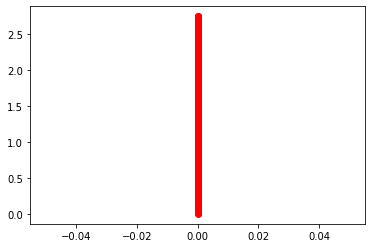

Integral: 0.0, Sample Var: 0.0


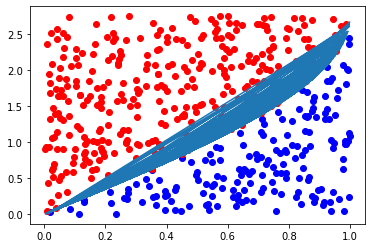

Integral: 0.346, Sample Var: 0.22628399999999999
Integral: 0.0, Sample Var: 0.0
Integral: 0.3572, Sample Var: 0.22960816000000003


In [101]:
int_0_to_0  = 0
int_0_to_1 = 0.375
integrate(500, 0, 1)
integrate(500, 1, 1)



#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
assert integrate(1000, 0, False)[0]==int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, 1, False)[0],int_0_to_1,abs_tol=0.03), "Error: upper endpoint test failing"

The first test is checking what $\int_{0}^{0} f(x)$ would equal. It should be zero because we are not summing any range, zero to zero is zero. 

The second test is checking what $\int_{0}^{1} f(x)$ should output. This represents the upper bound or the max possible integral. 

This is a reasonable test because if the function can output both the lower and upper bound, it can also correctly output all the values in between. (2 points define a line and f(x) is a line). It also is a good test because all the previous probabilites that are summed to get the upper bound must also be correct.

This is not an entireley valid PDF because we can only numerically integrate or create an approximation of an integral using a computer. We are also generating random values between 0 and 1 when random values should be taken from negative infinity to infinity and then only counting the probability of values from 0 to 1 that are below f(x).


**Part F.** Run your simulation with `isPlot=True` and `ub=`$1$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**?  As a whole, what advantage does this process offer over actually doing the integral by hand?

**Solution:**

1000 Samples: 


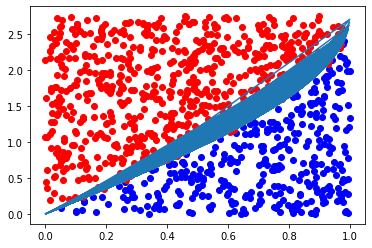

Integral: 0.348, Sample Var: 0.22689599999999996
10000 Samples:
Integral: 0.3654, Sample Var: 0.23188283999999995


(0.3654, 0.23188283999999995)

In [99]:
#Integrate, plot, and estimate!
#isplot is true
print('1000 Samples: ')
integrate(1000, 1, 1)
print('10000 Samples:')
integrate(10000, 1, 0)

In part A, I solved to integral from 0 to 1/2 and got 0.224. Here, the integral is from 0 to 1 so it is slightly different but still on the same order. This process can be more adventageous because it is easier to solve integrals once the code is written. It also can display the different random points and those that fall under or above the function.